# Test - Likelihood1DPlot

This notebook demonstrates some common usage scenario for the `Likelihood1DPlot` class

In [14]:
import numpy as np
import pandas as pd

# generate a pseudo likelihood curve

x1 = np.linspace(3.5, 10.5, 100)
y1 = (x1 - 7) ** 2

df = pd.DataFrame({'x': x1, 'y': y1})

In [15]:
from quickstats.plots import Likelihood1DPlot

# to draw a single likelihood curve, just pass the dataframe to the plotting class
plotter = Likelihood1DPlot(df)

In [16]:
# check the arguments for drawing
help(plotter.draw)

Help on method draw in module quickstats.plots.likelihood_1D_plot:

draw(xattrib: 'str', yattrib: 'str' = 'qmu', xlabel: 'Optional[str]' = None, ylabel: 'Optional[str]' = '$-2\\Delta ln(L)$', targets: 'Optional[List[str]]' = None, ymin: 'float' = 0, ymax: 'float' = 7, xmin: 'Optional[float]' = None, xmax: 'Optional[float]' = None, draw_level_lines: 'bool' = True, draw_level_intervals: 'bool' = False, sigma_levels: 'Optional[Tuple[float, ...]]' = (1, 2), confidence_levels: 'Optional[Tuple[float, ...]]' = None) -> 'Any' method of quickstats.plots.likelihood_1D_plot.Likelihood1DPlot instance
    Draw likelihood profile plot.
    
    Parameters
    ----------
    xattrib : str
        Column name for x values
    yattrib : str, default 'qmu'
        Column name for likelihood values
    xlabel, ylabel : Optional[str]
        Axis labels
    targets : Optional[List[str]]
        Targets to plot
    ymin, ymax : float
        Y-axis limits
    xmin, xmax : Optional[float]
        X-axis lim

<Axes: xlabel='$m_{\\gamma\\gamma}$', ylabel='$-2\\Delta ln(L)$'>

<Figure size 640x480 with 0 Axes>

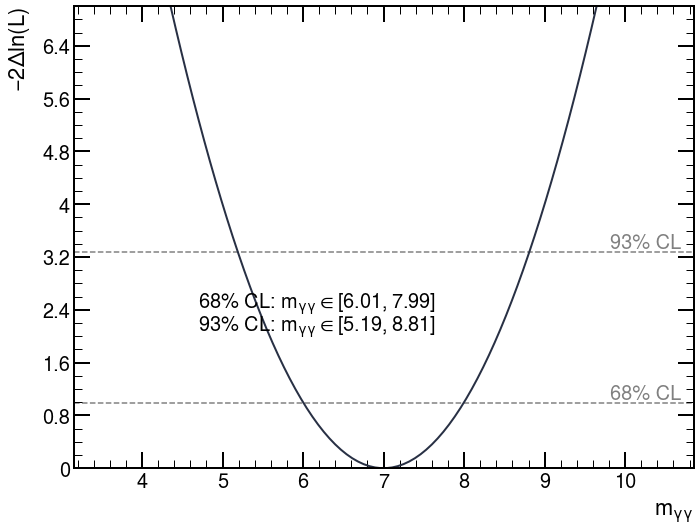

In [17]:
plotter.draw(
    'x', 'y', xlabel=r'$m_{\gamma\gamma}$',
    sigma_levels=None, # no likelihood levels in terms of sigma
    confidence_levels=(0.68, 0.93), # likelihood levels in terms of 68% and 93% confidence levels
    draw_level_intervals=True, # draw the text showing the values of the intervals (i.e. the intersection points)
)

<Axes: xlabel='$m_{\\gamma\\gamma}$', ylabel='$-2\\Delta ln(L)$'>

<Figure size 640x480 with 0 Axes>

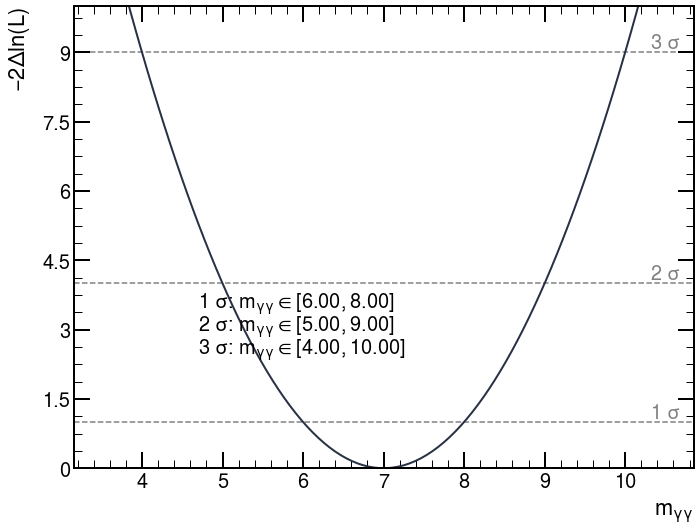

In [18]:
# now draw the intervals in terms of sigma instead
plotter.draw(
    'x', 'y', xlabel=r'$m_{\gamma\gamma}$',
    sigma_levels=(1, 2, 3),
    confidence_levels=None,
    draw_level_intervals=True,
    ymax=10, # need to update ymax so that 3 sigma can be shown  
)

<Axes: xlabel='$m_{\\gamma\\gamma}$', ylabel='$-2\\Delta ln(L)$'>

<Figure size 640x480 with 0 Axes>

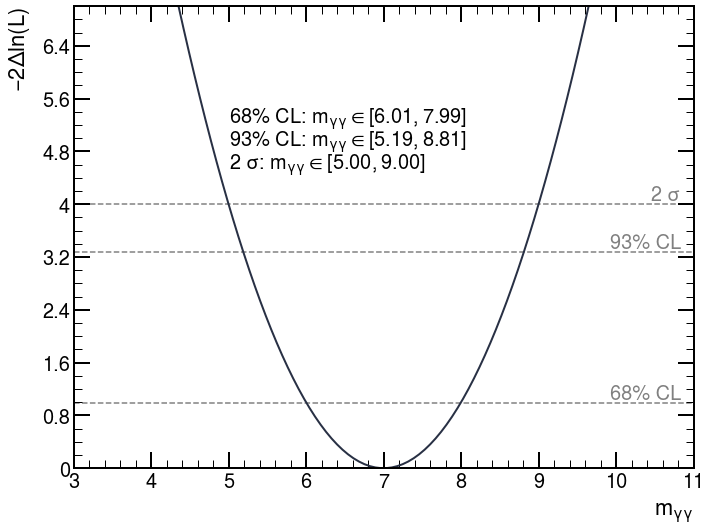

In [19]:
# fixing the location of the level intervals 
plotter.styles['level_interval']['loc'] = (0.25, 0.8)
plotter.draw(
    'x', 'y', xlabel=r'$m_{\gamma\gamma}$',
    sigma_levels=(2,), 
    confidence_levels=(0.68, 0.93),
    draw_level_intervals=True,
    xmin=3,
    xmax=11,      
)

In [20]:
# checking what's in styles['level_interval']
plotter.styles['level_interval']

{'loc': (0.25, 0.8),
 'main_text': '',
 'interval_text': '{level_label}: {xlabel}$\\in {intervals}$',
 'dy': 0.05,
 'decimal_place': 2}

<Axes: xlabel='$m_{\\gamma\\gamma}$', ylabel='$-2\\Delta ln(L)$'>

<Figure size 640x480 with 0 Axes>

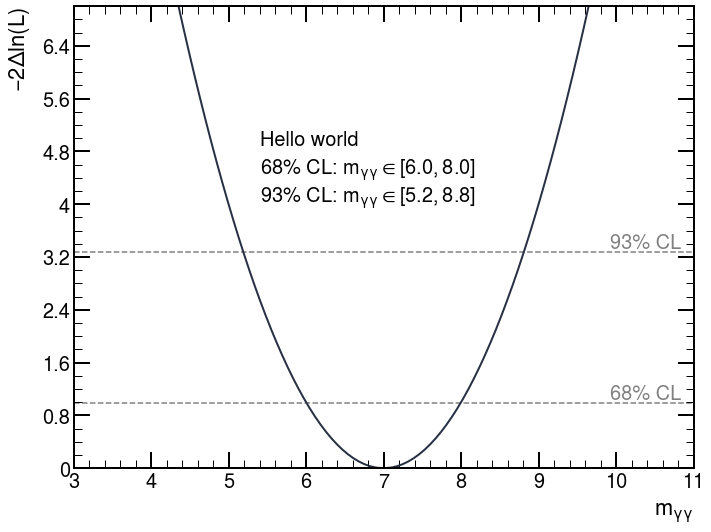

In [23]:
# a better way will be to update styles during initialization
styles = {
    'level_interval': {
        'loc': (0.3, 0.7),
        'main_text': 'Hello world',
        'decimal_place': 1,
        'dy': 0.06
    }
}

plotter = Likelihood1DPlot(df, styles=styles)
plotter.draw(
    'x', 'y', xlabel=r'$m_{\gamma\gamma}$',
    sigma_levels=None, 
    confidence_levels=(0.68, 0.93), 
    draw_level_intervals=True,
    xmin=3,
    xmax=11,    
)

In [24]:
import numpy as np
import pandas as pd

# generate two pseudo likelihood curves
x1 = np.linspace(4, 10, 100)
y1 = (x1 - 7) ** 2

x2 = np.linspace(4, 10, 100)
y2 = (x1 - 6) ** 2

df = pd.DataFrame({'x': x1, 'y': y1})

# put them in a dictionary of dataframes
dfs = {
    'A': pd.DataFrame({'x': x1, 'y': y1}),
    'B': pd.DataFrame({'x': x2, 'y': y2})
}

In [46]:
# per target styles
styles_map = {
    'A': {
        'plot': {
            'linestyle': '--',
            'color': 'r'
        },
        'level_interval': {
            'main_text': 'A interval',
            'loc': (0.22, 0.6)
        }
    },
    'B': {
        'level_interval': {
            'main_text': 'B interval',
            'loc': (0.22, 0.78)
        }
    }    
}

# global styles
styles = {
    'annotation': {
        'fontsize': 20 # font size of level interval controlled by annotation
    },
    'legend': {
        'loc': (0.5, 0.82) # location of legend
    }
}

plotter = Likelihood1DPlot(dfs, styles_map=styles_map, styles=styles)

<Axes: xlabel='$m_{\\gamma\\gamma}$', ylabel='$-2\\Delta ln(L)$'>

<Figure size 640x480 with 0 Axes>

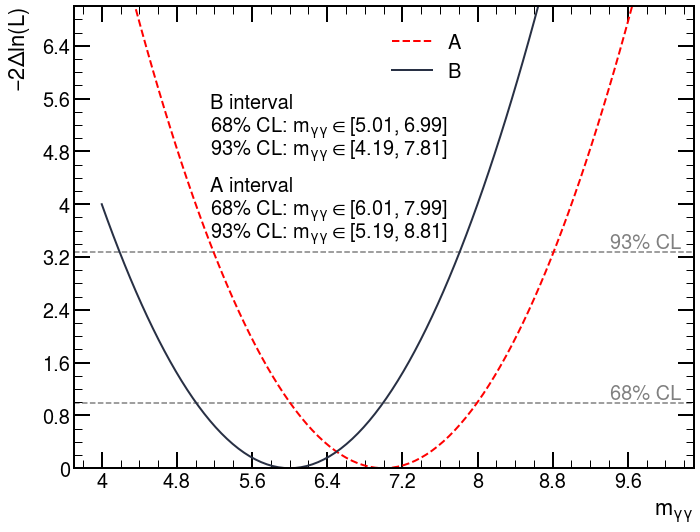

In [47]:
# draw all targets at once
plotter.draw('x', 'y', xlabel=r'$m_{\gamma\gamma}$',
             sigma_levels=None, draw_level_intervals=True, confidence_levels=(0.68, 0.93))

<Axes: xlabel='$m_{\\gamma\\gamma}$', ylabel='$-2\\Delta ln(L)$'>

<Figure size 640x480 with 0 Axes>

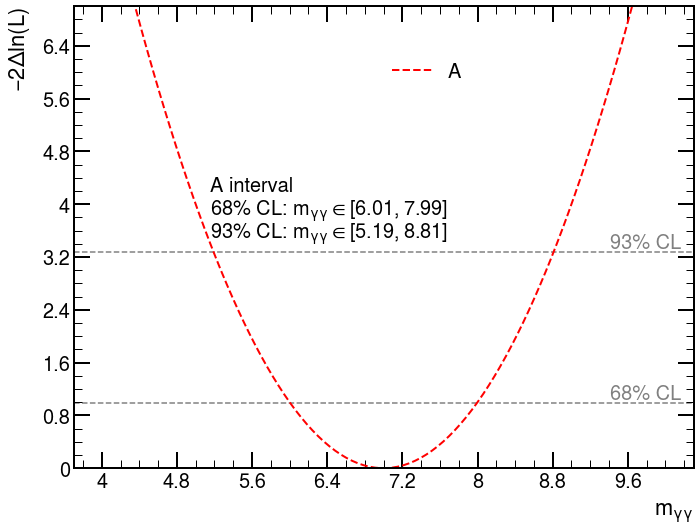

In [48]:
# draw selected targets
plotter.draw('x', 'y', xlabel=r'$m_{\gamma\gamma}$',
             targets=['A'],
             sigma_levels=None, draw_level_intervals=True, confidence_levels=(0.68, 0.93))